# Project

Author: Norbert Antal
<br>

### Project description

This project explores the PlantGrowth dataset using statistical analysis techniques, including t-tests and ANOVA, to identify significant differences between treatment groups. 

### Project brief
Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

The aim is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. <br>

#### Project tasks:

Download and save the dataset to your repository.

Describe the data set in the notebook.

Describe what a t-test is, how it works, and what the assumptions are.

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for boxplot
from scipy import stats

### Download and save the dataset to your repository.

In [10]:
df = pd.read_csv("data/plantgrowth.csv")
#df
df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


### Describe the data set in your notebook.

In [11]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [12]:
df.groupby('group').describe()


rownames                                                weight         \
         count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                         
ctrl      10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1      10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2      10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31

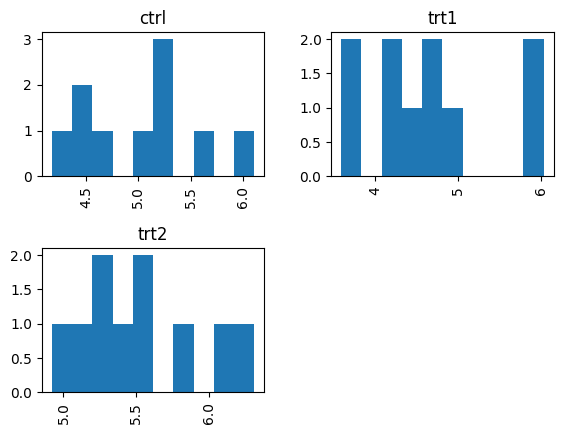

In [13]:
# visualise data by groups with histogram ref: https://www.statology.org/pandas-histogram-by-group/
df['weight'].hist(by=df['group'])
plt.show()

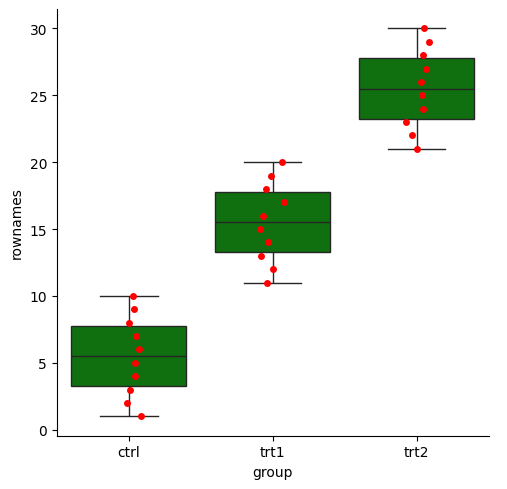

In [14]:
# visualise data by groups with boxplot and catplot ref: https://www.statology.org/pandas-histogram-by-group/
sns.catplot(data=df, x='group', y=df.columns[0], color="red")
sns.boxplot(data=df, x='group', y=df.columns[0], color="green")
plt.show()

### Describe what a t-test is, how it works, and what the assumptions are.
### Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2

# Independent two-sample t-test
Equal sample sizes and variance
- Given two groups (1, 2), this test is only applicable when:
  - the two sample sizes are equal,
  - it can be assumed that the two distributions have the same variance.
   
The t statistic to test whether the means are different can be calculated as follows:

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{2}{n}}}
$$

where

$$
s_p = \sqrt{\frac{s_{X_1}^2 + s_{X_2}^2}{2}}
$$


Null hypothesis is that the 